In [15]:
import io
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import time
import seaborn as sns

In [18]:
plt.rcParams['figure.figsize']  = (16, 10)
plt.rcParams['axes.labelsize']  = 20
plt.rcParams['axes.titlesize']  = 20
plt.rcParams['legend.fontsize'] = 20
plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20
plt.rcParams['lines.linewidth'] = 4

In [19]:
plt.ion()
plt.style.use('seaborn-colorblind')

In [2]:
conn = sqlite3.connect('sql/sql.db')
cursor = conn.cursor()

In [3]:
#Executar só uma vez a cada vez que abrir o colab
f = io.open('sql/trabalho.sql', 'r', encoding='ISO-8859-1')
sql = f.read()
cursor.executescript(sql)

Modelo relacional
<img src="diagrama/diagrama.png">

In [21]:
query = """
Select *
FROM SIZE Natural JOIN ANSWERS NATURAL JOIN Country
where TIPO = SUBSET
"""

populacao = pd.read_sql_query(query,conn)
populacao

,COUNTRYCODE,TIPO,VALOR,SUBSET,QC,ANSWER,PERCENTAGE,NOTES,COUNTRY
0,0,LESBIAN,437,LESBIAN,b1_a,Very widespread,8,NULL,AT
1,0,LESBIAN,437,LESBIAN,b1_a,Fairly widespread,34,NULL,AT
2,0,LESBIAN,437,LESBIAN,b1_a,Fairly rare,45,NULL,AT
3,0,LESBIAN,437,LESBIAN,b1_a,Very rare,9,NULL,AT
4,0,LESBIAN,437,LESBIAN,b1_a,Don`t know,4,[0],AT
...,...,...,...,...,...,...,...,...,...
88190,11,TRANS,813,TRANS,fb2_9,Lesbian,1,[0],GB
88191,11,TRANS,813,TRANS,fb2_9,Gay,3,[0],GB
88192,11,TRANS,813,TRANS,fb2_9,Bisexual,1,[0],GB
88193,11,TRANS,813,TRANS,fb2_9,Mixed sexual orientation,3,NULL,GB


<AxesSubplot:xlabel='COUNTRY', ylabel='VALOR'>

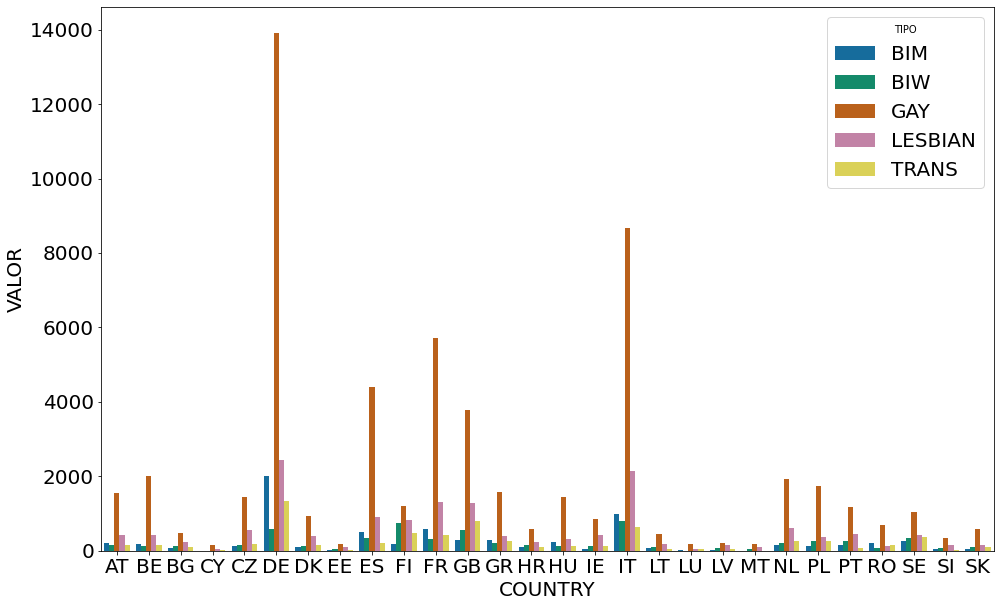

In [23]:
p = populacao.groupby(["COUNTRY","TIPO"]).mean()[["VALOR"]].reset_index()
sns.barplot(x = "COUNTRY", y = "VALOR", data = p, hue = "TIPO")

In [ ]:
#f.close()
#conn.close()